# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [2]:
## IMPORT YOUR LIBS HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import metrics

from functools import reduce

# Libraries for helping us with text
import string
# Regular Expression Library
import re

import nltk 
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# You may need to download these from nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
stopwords = stopwords.words('english')

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [27]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv("data/20-newsgroups.csv")

In [28]:
# 3. Inspect / remove nulls and duplicates
df.isna().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [15]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

topic_category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [40]:
# 1. Make a function that makes all text lowercase.

def lowercase(text):
    return text.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
lowercase(test_string)

'this is a sentence with lots of caps.'

In [42]:
# 2. Make a function that removes all punctuation. 

def punc_remove(text):
    return re.sub(r'[^\w\s]','',text)

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
punc_remove(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [45]:
# 3. Make a function that removes all stopwords.

def stop_remove(text):
    return ' '.join([word for word in text.split() if word not in stopwords])
test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
test_string = 'This is a sentence! With some different stopwords i have added in here.'

print(stop_remove(test_string))
print(remove_stopwords(test_string))


This sentence! With different stopwords added here.
This sentence ! With different stopwords added .


In [44]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

def stem_words(text):
    porter = PorterStemmer()
    words = word_tokenize(text)
    valid_words = [porter.stem(word) for word in words]
    return ' '.join(valid_words)

test_string = 'I played and started playing with players and we all love to play with plays'
stem_words(test_string)


'i play and start play with player and we all love to play with play'

In [46]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def text_pipeline(text):
    functions = [lowercase, punc_remove, stop_remove, stem_words]
    return reduce(lambda t,f: f(t), functions,text)
'''        
def text_pipeline2(text):
    text = lowercase(text)
    text = punc_remove(text)
    text = stop_remove(text)
    text = stem_words(text)
    return text'''

test_string = 'I played and started playing with players and we all love to play with plays'
print(text_pipeline(test_string))
#print(text_pipeline2(test_string))

play start play player love play play


In [41]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['message_clean'] = df['message'].apply(text_pipeline)

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [43]:
# 0. Define your `X` and `y` data. 
X = df['message_clean']
y = df['topic_category']


In [55]:
# 1. Train test split your data.
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [56]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()


In [57]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X_train)


TfidfVectorizer()

In [58]:
# 4. Transform your X data using your fitted vectorizer. 

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [59]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

X_train.shape

(9051, 103723)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [62]:
# 1. Initalize an empty model. 

model = MultinomialNB()


In [63]:
# Fit our model with our training data.

model.fit(X_train, y_train)


MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [64]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)


In [66]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.872293


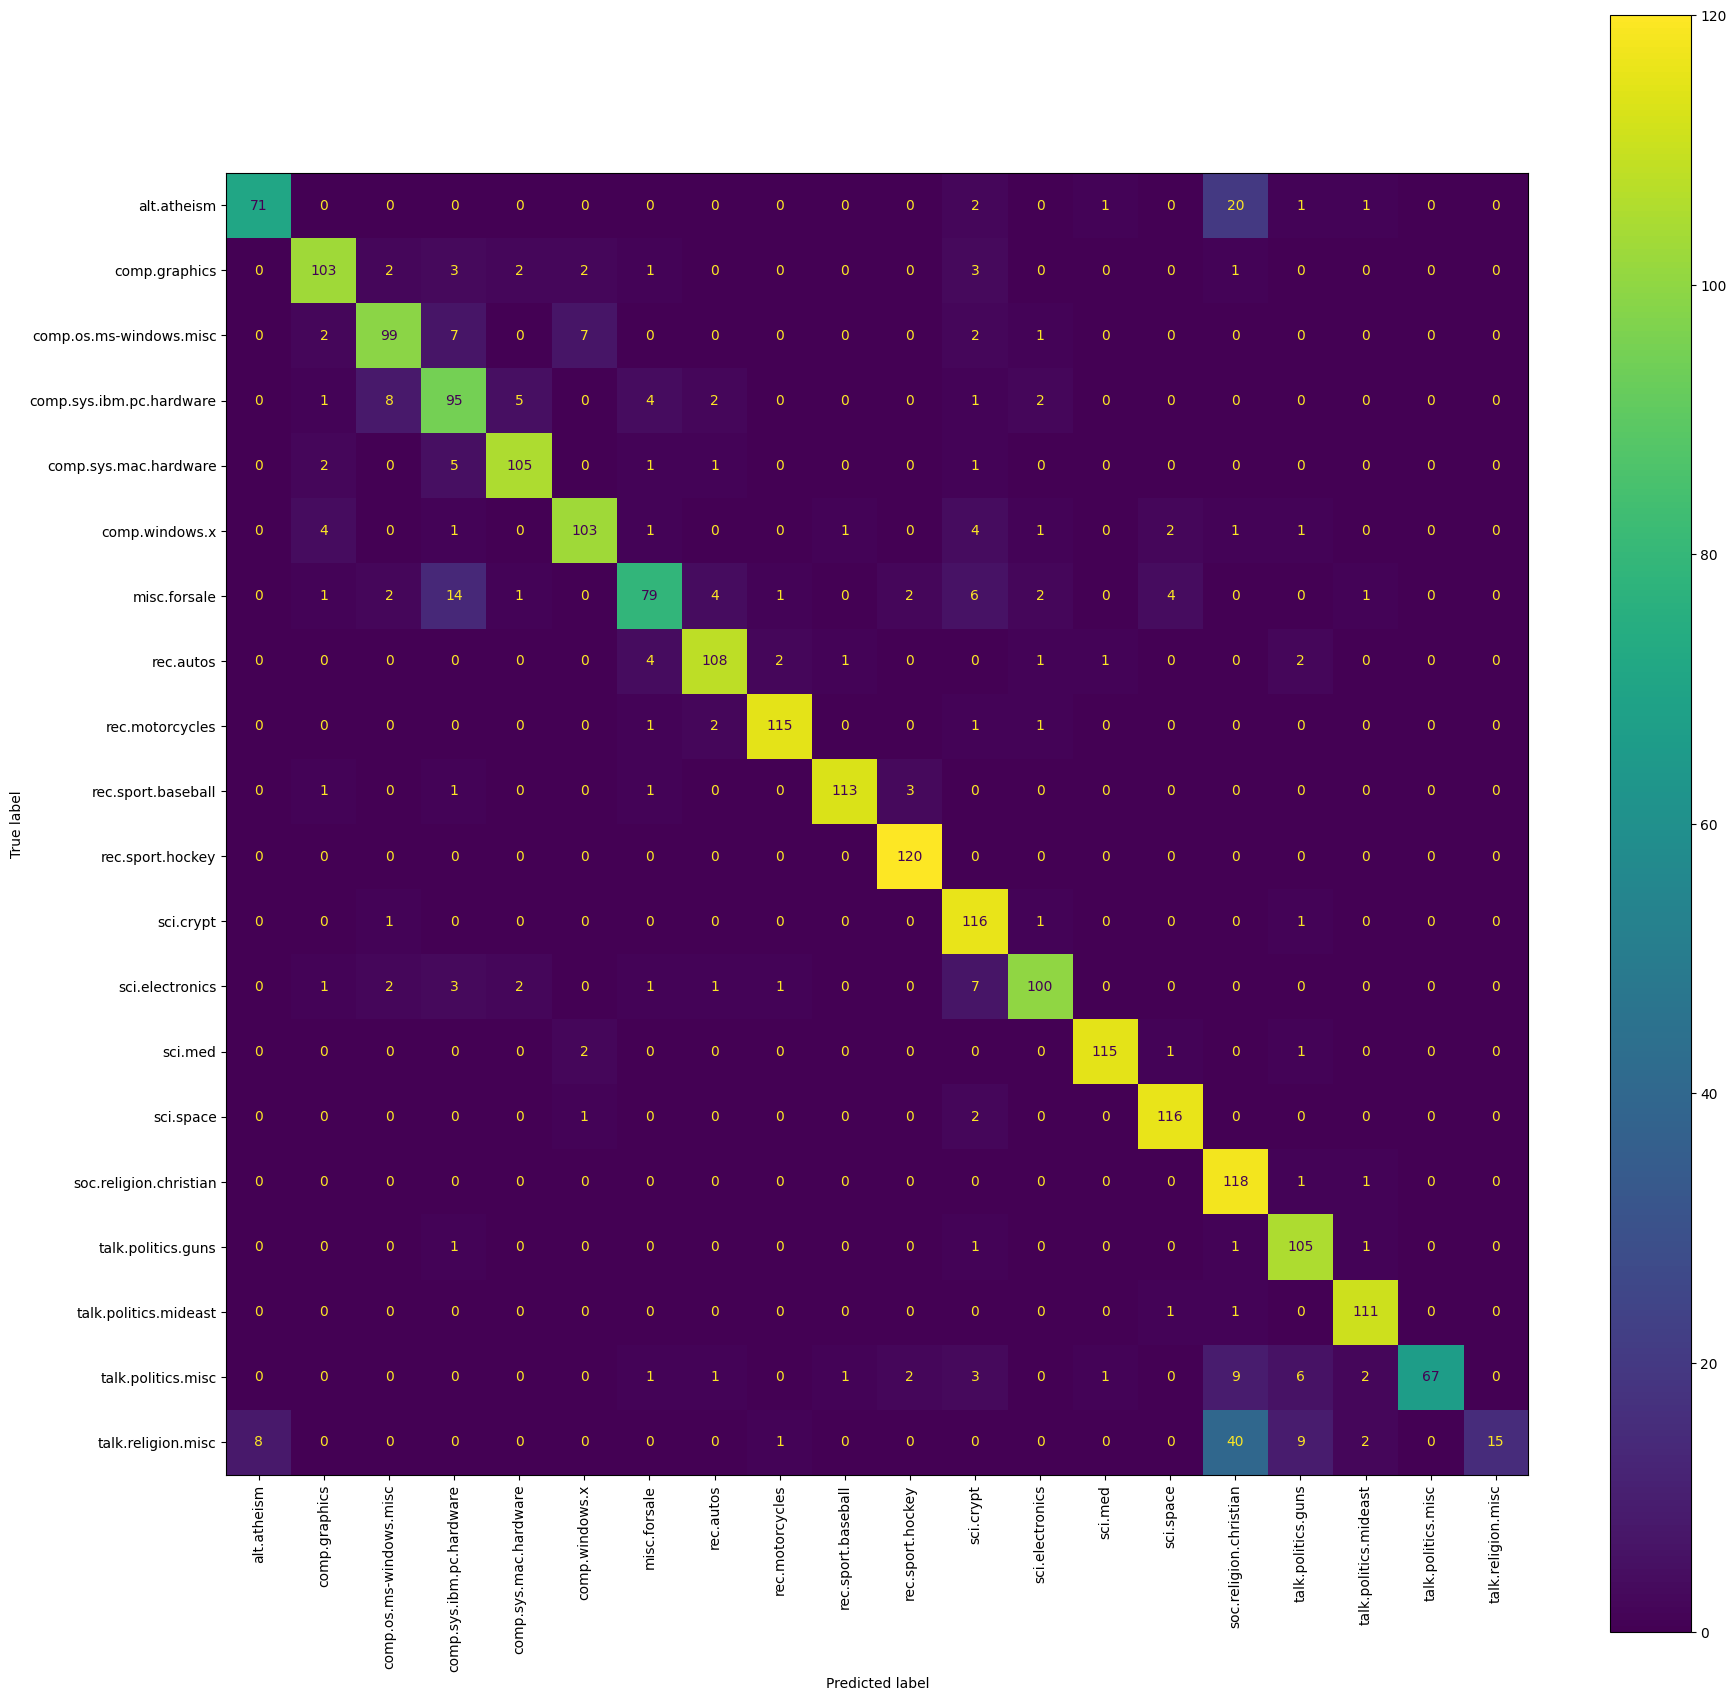

In [70]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [71]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.90      0.74      0.81        96
           comp.graphics       0.90      0.88      0.89       117
 comp.os.ms-windows.misc       0.87      0.84      0.85       118
comp.sys.ibm.pc.hardware       0.73      0.81      0.77       118
   comp.sys.mac.hardware       0.91      0.91      0.91       115
          comp.windows.x       0.90      0.87      0.88       119
            misc.forsale       0.84      0.68      0.75       117
               rec.autos       0.91      0.91      0.91       119
         rec.motorcycles       0.96      0.96      0.96       120
      rec.sport.baseball       0.97      0.95      0.96       119
        rec.sport.hockey       0.94      1.00      0.97       120
               sci.crypt       0.78      0.97      0.87       119
         sci.electronics       0.92      0.85      0.88       118
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [87]:
my_sentence = "some children died yesterday"

# 1. Apply the text pipeline to your sentence
new_text = text_pipeline(my_sentence)

print(new_text)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
transformed_text = vectorizer.transform([new_text])

# 3. Use the model to predict your new `X`. 
new_prediction = model.predict(transformed_text)

# 4. Print the prediction
print(new_prediction)

children die yesterday
['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [47]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

df.shape


(86460, 3)

In [48]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L"
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Alta Vista teacher is one of several recognized by @RepDarrenSoto for National Teacher Apprecia…
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurricane Maria has left approximately $90 billion in damages. \n\nCongress has allocated about $18…
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto . Thanks for taking the time to meet with @LatinoLeader ED Marucci Guzman. #NALCABPolicy2018.…
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June 1st; Puerto Rico’s readiness...well 🤦🏼‍♂️😡😩@Pwr4PuertoRico @RepDarrenSoto @EspaillatNY


In [49]:
df.Party.value_counts()

Party
Republican    44392
Democrat      42068
Name: count, dtype: int64

In [116]:
for s in df.Tweet.sample(5):
    print(s)

Spending time today to #ReadTheBill. Will share my thoughts after a thorough review. https://t.co/SPrwVrFBCA
One of the biggest catastrophes of U.S. withdrawal from the #IranDeal is isolation from the world stage. https://t.co/kBU6pRrzwH
Chair @RepCharlieDent: This bill funds our veteran health care system to ensure that our promise to care for those… https://t.co/KYdbPxUvMa
Look at the numbers and ask yourself: Who is the Republican tax plan really designed to help? https://t.co/RUTifDfQIm
Who pays for the $1.5 trillion the #GOPTaxScam adds to the deficit? Our kids and grandkids.


In [50]:
df['tweet_clean'] = df.Tweet.apply(text_pipeline)


In [51]:
X = df['tweet_clean']
y = df['Party']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [53]:
vectorizer = TfidfVectorizer()

In [54]:
vectorizer.fit(X_train)

TfidfVectorizer()

In [55]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [56]:
model = MultinomialNB()

In [57]:
model.fit(X_train, y_train)

MultinomialNB()

In [58]:
y_pred = model.predict(X_test)

In [59]:
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.807078


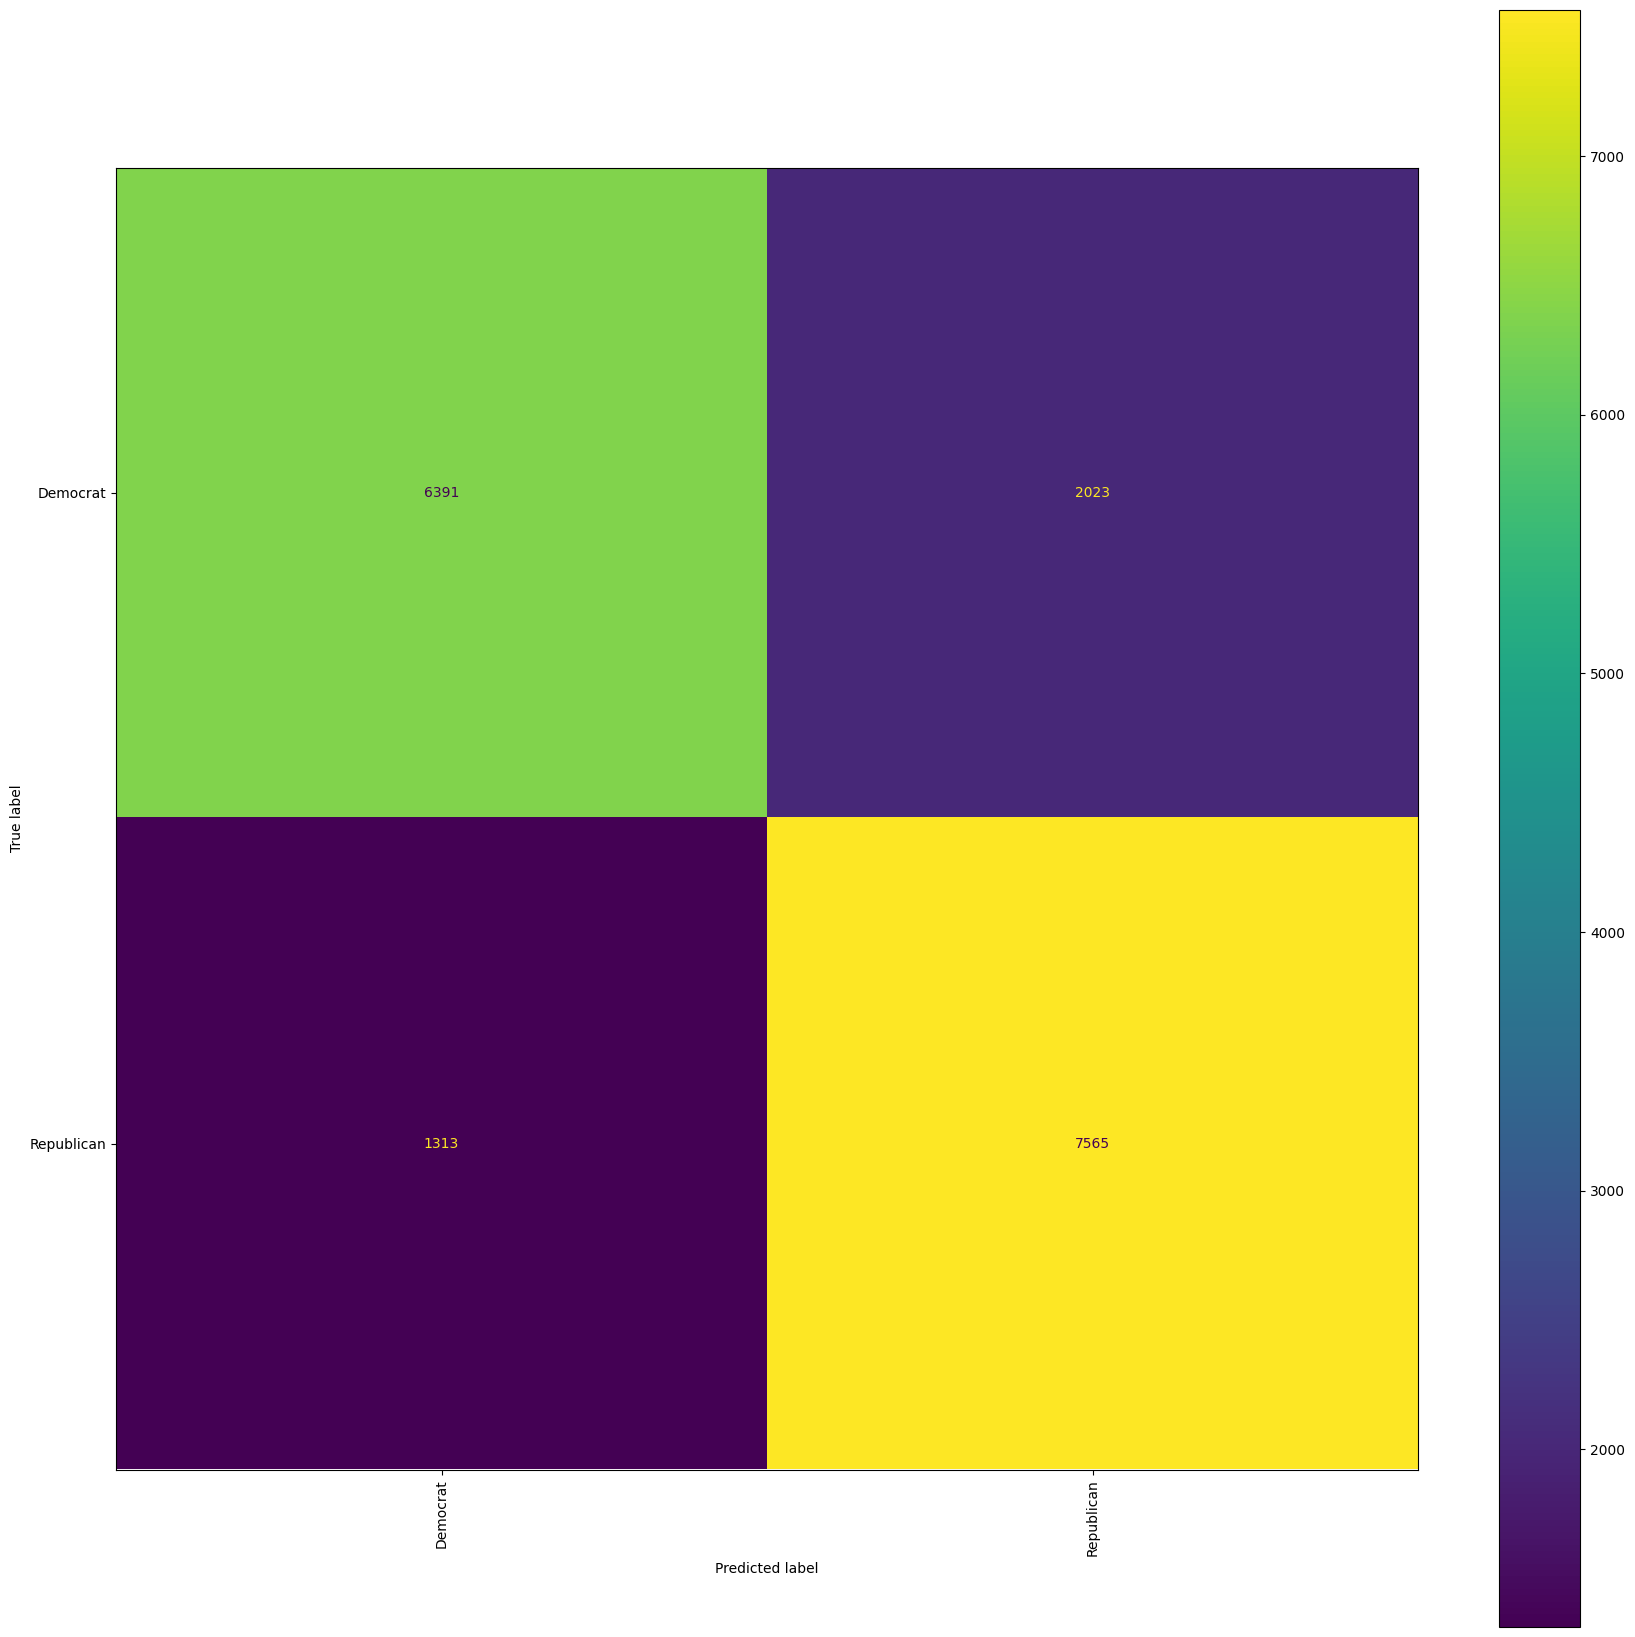

In [60]:
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [61]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.83      0.76      0.79      8414
  Republican       0.79      0.85      0.82      8878

    accuracy                           0.81     17292
   macro avg       0.81      0.81      0.81     17292
weighted avg       0.81      0.81      0.81     17292

